In [1]:
import pandas as pd

df = pd.read_csv('kursovaya.csv') 

df

,Date,Name,Text
0,2022-02-25,Стенограмма заседания парламента (2022.02.25),The invasion of the Russian army into Ukrainia...
1,2022-02-25,Стенограмма заседания парламента (2022.02.25),working closely with the international communi...
2,2022-02-25,Стенограмма заседания парламента (2022.02.25),"As for Russia, we have developed diplomacy to ..."
3,2022-02-25,Стенограмма заседания парламента (2022.02.25),I hope that the day will come soon when Russia...
4,2022-03-04,Стенограмма заседания парламента (2022.03.04),I feel that the structure of the big world is ...
...,...,...,...
482,2022-09-30,Kishida Fumio Twitter,"Japan strongly condemns Russia's\n""incorporati..."
483,2022-09-30,Kishida Fumio Twitter,Japan cannot condone any attempts to unilatera...
484,2022-09-30,Kishida Fumio Twitter,"We strongly condemn Russia's ""annexation"" of p..."
485,2022-11-17,Kishida Fumio Twitter,"Furthermore, at the G7/NATO emergency summit c..."


In [2]:
pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------------------- ------------------- 61.4/126.0 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
analyzer = SentimentIntensityAnalyzer()

df['compound'] = df['Text'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
df['neg'] = df['Text'].apply(lambda x: analyzer.polarity_scores(str(x))['neg'])
df['neu'] = df['Text'].apply(lambda x: analyzer.polarity_scores(str(x))['neu'])
df['pos'] = df['Text'].apply(lambda x: analyzer.polarity_scores(str(x))['pos'])

In [5]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['compound'].apply(classify_sentiment)

In [6]:
print(df[['Date', 'Text', 'compound', 'sentiment']].head())

print(df['sentiment'].value_counts())

         Date                                               Text  compound  \
0  2022-02-25  The invasion of the Russian army into Ukrainia...   -0.1280   
1  2022-02-25  working closely with the international communi...    0.4215   
2  2022-02-25  As for Russia, we have developed diplomacy to ...    0.7579   
3  2022-02-25  I hope that the day will come soon when Russia...   -0.4019   
4  2022-03-04  I feel that the structure of the big world is ...    0.0000   

  sentiment  
0  negative  
1  positive  
2  positive  
3  negative  
4   neutral  
sentiment
positive    208
negative    193
neutral      86
Name: count, dtype: int64


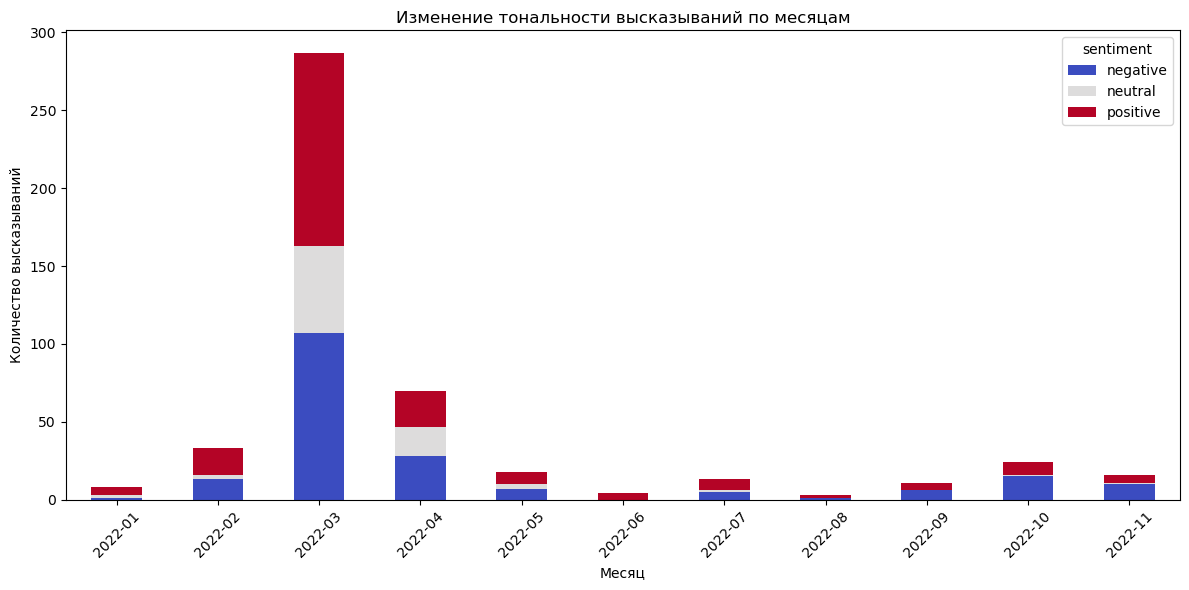

In [10]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.to_period('M').astype(str)

sentiment_by_month = df.groupby(['month', 'sentiment']).size().unstack().fillna(0)

sentiment_by_month.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Изменение тональности высказываний по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество высказываний")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
import matplotlib.pyplot as plt

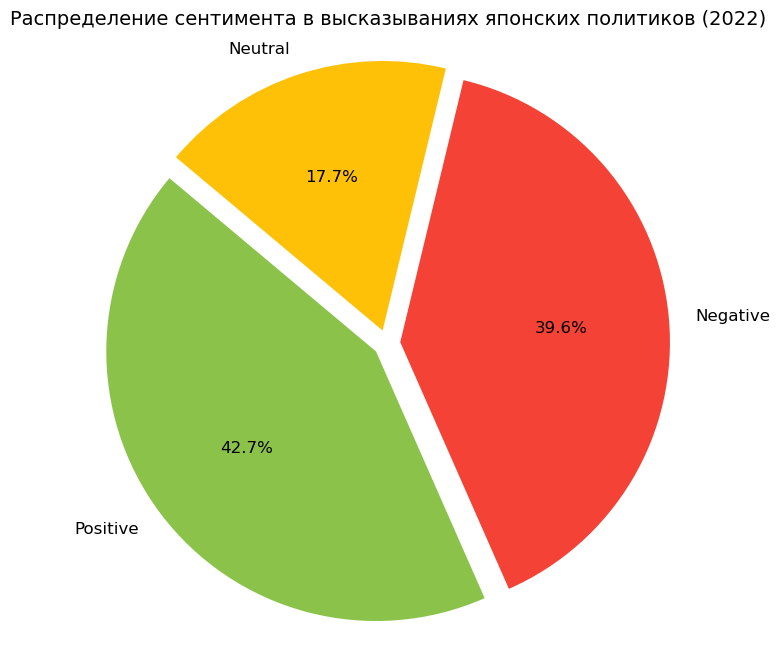

In [13]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [208, 193, 86]
colors = ['#8BC34A', '#F44336', '#FFC107'] 
explode = (0.05, 0.05, 0.05) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Распределение сентимента в высказываниях японских политиков (2022)', fontsize=14)
plt.axis('equal') 
plt.show()